# Loading track metadata

In [1]:
import csv
import re
import json
tracks_metadata = {}
with open('fma/fma_metadata/raw_tracks.csv', encoding='utf-8') as fin:
    reader = csv.reader(fin, skipinitialspace=True, quotechar="\"")
    headers = []
    rownum = 0
    for row in reader:
        if rownum == 0:
            headers = row
            rownum += 1
        else:
            trackid = '%06d' % int(row[0])
            fname = 'fma/fma_full/%s/%s.mp3' % (trackid[:3], trackid)
            tracks_metadata[fname] = dict(zip(headers, row))
            if len(tracks_metadata[fname]['track_genres']) > 0:
                genres = json.loads(re.sub(r'\'', '"', tracks_metadata[fname]['track_genres'])) # fix json quotes
                tracks_metadata[fname]['track_genres'] = list(map(lambda g: g['genre_title'], genres))

In [2]:
len(tracks_metadata)

109727

In [3]:
list(tracks_metadata.keys())[:10]

['fma/fma_full/000/000002.mp3',
 'fma/fma_full/000/000003.mp3',
 'fma/fma_full/000/000005.mp3',
 'fma/fma_full/000/000010.mp3',
 'fma/fma_full/000/000020.mp3',
 'fma/fma_full/000/000026.mp3',
 'fma/fma_full/000/000030.mp3',
 'fma/fma_full/000/000046.mp3',
 'fma/fma_full/000/000048.mp3',
 'fma/fma_full/000/000134.mp3']

In [4]:
list(tracks_metadata['fma/fma_full/000/000002.mp3'].keys())

['track_id',
 'album_id',
 'album_title',
 'album_url',
 'artist_id',
 'artist_name',
 'artist_url',
 'artist_website',
 'license_image_file',
 'license_image_file_large',
 'license_parent_id',
 'license_title',
 'license_url',
 'tags',
 'track_bit_rate',
 'track_comments',
 'track_composer',
 'track_copyright_c',
 'track_copyright_p',
 'track_date_created',
 'track_date_recorded',
 'track_disc_number',
 'track_duration',
 'track_explicit',
 'track_explicit_notes',
 'track_favorites',
 'track_file',
 'track_genres',
 'track_image_file',
 'track_information',
 'track_instrumental',
 'track_interest',
 'track_language_code',
 'track_listens',
 'track_lyricist',
 'track_number',
 'track_publisher',
 'track_title',
 'track_url']

In [5]:
tracks_metadata['fma/fma_full/000/000002.mp3']

{'album_id': '1',
 'album_title': 'AWOL - A Way Of Life',
 'album_url': 'http://freemusicarchive.org/music/AWOL/AWOL_-_A_Way_Of_Life/',
 'artist_id': '1',
 'artist_name': 'AWOL',
 'artist_url': 'http://freemusicarchive.org/music/AWOL/',
 'artist_website': 'http://www.AzillionRecords.blogspot.com',
 'license_image_file': 'http://i.creativecommons.org/l/by-nc-sa/3.0/us/88x31.png',
 'license_image_file_large': 'http://fma-files.s3.amazonaws.com/resources/img/licenses/by-nc-sa.png',
 'license_parent_id': '5',
 'license_title': 'Attribution-NonCommercial-ShareAlike 3.0 International',
 'license_url': 'http://creativecommons.org/licenses/by-nc-sa/3.0/',
 'tags': '[]',
 'track_bit_rate': '256000',
 'track_comments': '0',
 'track_composer': '',
 'track_copyright_c': '',
 'track_copyright_p': '',
 'track_date_created': '11/26/2008 01:48:12 AM',
 'track_date_recorded': '11/26/2008',
 'track_disc_number': '1',
 'track_duration': '02:48',
 'track_explicit': 'Radio-Unsafe',
 'track_explicit_notes':

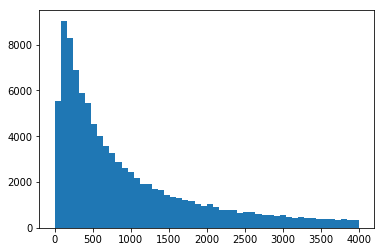

In [6]:
import matplotlib.pyplot as plt
plt.hist(list(filter(lambda listens: listens < 4000, 
                     map(lambda t: int(tracks_metadata[t]['track_listens']),
                         tracks_metadata.keys()))),
         bins=50)
plt.show()

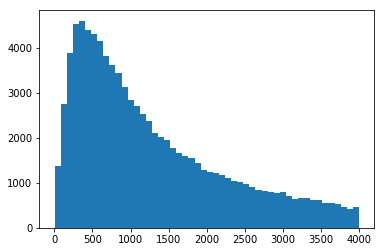

In [7]:
plt.hist(list(filter(lambda interest: interest < 4000,
                     map(lambda t: int(tracks_metadata[t]['track_interest']), 
                         tracks_metadata.keys()))),
         bins=50)
plt.show()

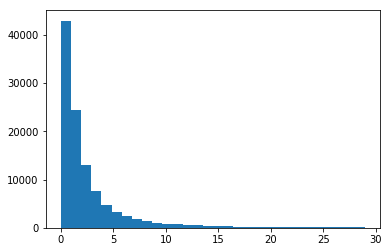

In [8]:
plt.hist(list(filter(lambda favorites: favorites < 30,
                     map(lambda t: int(tracks_metadata[t]['track_favorites']),
                         tracks_metadata.keys()))),
         bins=30)
plt.show()

# Exploration of track features

In [9]:
from essentia.standard import *

In [10]:
features, _ = MusicExtractor(lowlevelStats=['mean', 'stdev'],
                             rhythmStats=['mean', 'stdev'],
                             tonalStats=['mean', 'stdev'])('fma/fma_full/000/000002.mp3')

In [11]:
print(sorted(features.descriptorNames()))

['lowlevel.average_loudness', 'lowlevel.barkbands.mean', 'lowlevel.barkbands.stdev', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands.mean', 'lowlevel.erbbands.stdev', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.gfcc.cov', 'lowlevel.gfcc.icov', 'lowlevel.gfcc.mean

In [12]:
print("Filename:", features['metadata.tags.file_name'])
print("-"*80)
print("Replay gain:", features['metadata.audio_properties.replay_gain'])
print("EBU128 integrated loudness:", features['lowlevel.loudness_ebu128.integrated'])
print("EBU128 loudness range:", features['lowlevel.loudness_ebu128.loudness_range'])
print("-"*80)
print("MFCC mean:", features['lowlevel.mfcc.mean'])
print('Lowlevel dissonance mean:', features['lowlevel.dissonance.mean'])
print("-"*80)
print("BPM:", features['rhythm.bpm'])
print('Beats loudness mean:', features['rhythm.beats_loudness.mean'])
print("Beat positions (sec.)", features['rhythm.beats_position'])
print("-"*80)
print("Key/scale estimation (using a profile specifically suited for electronic music):",
      features['tonal.key_edma.key'], features['tonal.key_edma.scale'])

Filename: 000002.mp3
--------------------------------------------------------------------------------
Replay gain: -10.055500030517578
EBU128 integrated loudness: -14.002805709838867
EBU128 loudness range: 4.868924140930176
--------------------------------------------------------------------------------
MFCC mean: [-6.7903918e+02  8.7918533e+01 -1.7259655e+01  8.6274939e+00
 -1.7729234e+00  1.9107091e+00 -1.0454731e+00 -2.8658957e+00
 -7.9511056e+00 -9.2950386e-01 -7.5173125e+00 -2.1692748e+00
 -5.0922811e-01]
Lowlevel dissonance mean: 0.4697345495223999
--------------------------------------------------------------------------------
BPM: 83.02522277832031
Beats loudness mean: 0.07858049124479294
Beat positions (sec.) [  0.5572789   1.1261678   1.6950567   2.2523355   2.7980044   3.4017234
   4.017052    4.632381    5.2477098   5.8746486   6.6176867   7.3607254
   8.068934    8.777143    9.496962   10.21678    10.936599   11.644807
  12.376236   13.096054   13.815873   14.535691   15.2

In [13]:
marker = AudioOnsetsMarker(onsets=features['rhythm.beats_position'], type='beep')
audio = MonoLoader(filename='fma/fma_full/000/000002.mp3')()
marked_audio = marker(audio)
MonoWriter(filename='test.mp3')(marked_audio)

# Extract features for tracks

In [18]:
from essentia.standard import *
def extract_features(track):
    try:
        features, _ = MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                     rhythmStats=['mean', 'stdev'],
                                     tonalStats=['mean', 'stdev'])(track)
        genres = tracks_metadata[track]['track_genres']
        listens = int(tracks_metadata[track]['track_listens'])
        favorites = int(tracks_metadata[track]['track_favorites'])
        interest = int(tracks_metadata[track]['track_interest'])
        loudness = features['lowlevel.loudness_ebu128.integrated']
        loudness_range = features['lowlevel.loudness_ebu128.loudness_range']
        bpm = features['rhythm.bpm']
        beats_loudness = features['rhythm.beats_loudness.mean']
        tonal_key = features['tonal.key_edma.key']
        tonal_scale = features['tonal.key_edma.scale'],
        dissonance = features['lowlevel.dissonance.mean']
        f = {'genres': genres,
             'listens': listens,
             'favorites': favorites,
             'interest': interest,
             'loudness': loudness,
             'loudness_range': loudness_range,
             'bpm': bpm,
             'beats_loudness': beats_loudness,
             'tonal_key': tonal_key,
             'tonal_scale': tonal_scale,
             'dissonance': dissonance
            }
    except:
        f = {}
    return f

In [15]:
import random
import time
ts = list(tracks_metadata.keys())
random.shuffle(ts)

start = time.time()
track_features = {}
for t in ts[:10]:
    track_features[t] = extract_features(t)
end = time.time()
print(end - start)

347.20725655555725


In [16]:
track_features

{'fma/fma_full/018/018222.mp3': {'beats_loudness': 0.11321214586496353,
  'bpm': 83.11337280273438,
  'dissonance': 0.45790067315101624,
  'favorites': 1,
  'genres': ['Hip-Hop'],
  'interest': 1000,
  'listens': 509,
  'loudness': -17.096981048583984,
  'loudness_range': 5.927267074584961,
  'tonal_key': 'F',
  'tonal_scale': ('major',)},
 'fma/fma_full/020/020852.mp3': {'beats_loudness': 0.24055372178554535,
  'bpm': 119.98658752441406,
  'dissonance': 0.407480388879776,
  'favorites': 0,
  'genres': ['Avant-Garde',
   'Lo-Fi',
   'Krautrock',
   'Experimental Pop',
   'Unclassifiable',
   'Sound Poetry'],
  'interest': 1075,
  'listens': 131,
  'loudness': -17.268877029418945,
  'loudness_range': 4.257085800170898,
  'tonal_key': 'D#',
  'tonal_scale': ('minor',)},
 'fma/fma_full/056/056943.mp3': {'beats_loudness': 0.03015599399805069,
  'bpm': 109.72089385986328,
  'dissonance': 0.17602571845054626,
  'favorites': 0,
  'genres': ['Electronic'],
  'interest': 672,
  'listens': 513,


Time to extract features on 10 tracks: 300s

Number of tracks in total: 100k

Estimated time to extract features on all tracks: (100000/10) x 300s = about 35 days

Estimated time if done in parallel (16 threads) = about 52 hours

In [ ]:
# required 285378 seconds actually (79 hours)

import multiprocessing
pool = multiprocessing.Pool(16)
start = time.time()
track_features_list = pool.map(extract_features, ts)
track_features = dict(zip(ts, track_features_list))
pool.close()
pool.join() # see: https://stackoverflow.com/a/47683305
end = time.time()
print(end - start)

In [ ]:
# save results of all that processing
import pickle
with open('track_features.pkl', 'wb') as track_features_out:
    pickle.dump(track_features, track_features_out)
with open('tracks_metadata.pkl', 'wb') as track_metadata_out:
    pickle.dump(tracks_metadata, track_metadata_out)